In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("Global_Superstore.csv")

In [5]:
df.dropna(inplace=True)

In [ ]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

In [ ]:
df['Month'] = df['Order Date'].dt.to_period('M')


In [ ]:
df.drop_duplicates(inplace=True)


In [ ]:
df['Shipping Delay (Days)'] = (df['Ship Date'] - df['Order Date']).dt.days

In [ ]:
df.to_csv('cleaned_superstore.csv', index=False)

In [ ]:
sns.set(style="whitegrid")

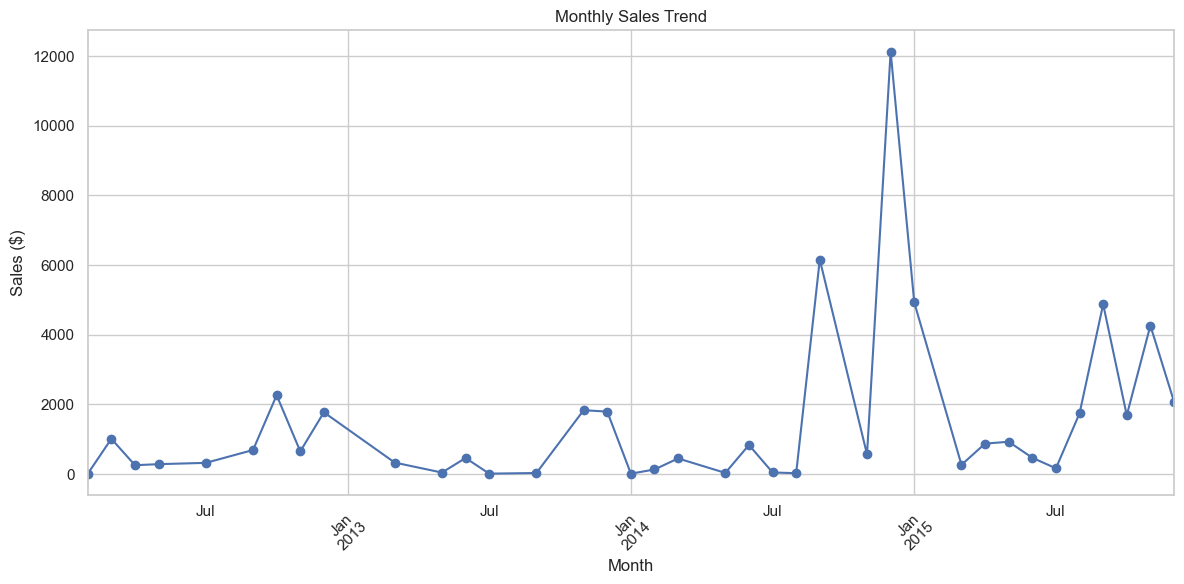

In [ ]:
plt.figure(figsize=(12, 6))
monthly_sales = df.groupby('Month')['Sales'].sum()
monthly_sales.plot(kind='line', marker='o')
plt.title('Monthly Sales Trend')
plt.ylabel('Sales ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

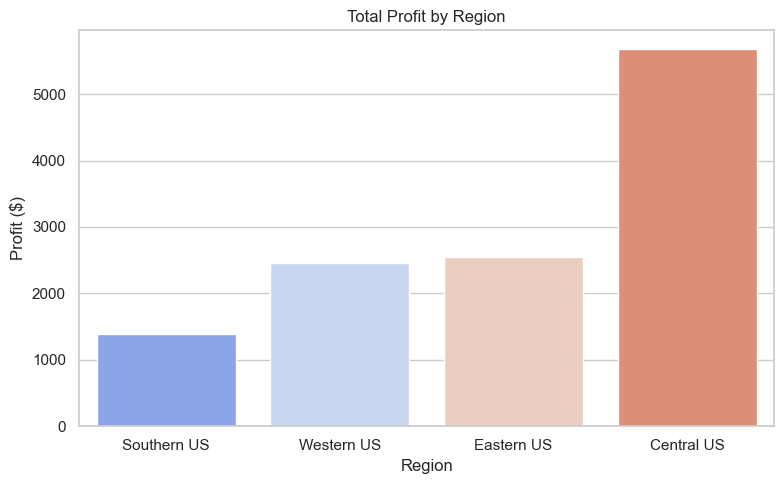

In [ ]:
plt.figure(figsize=(8, 5))
region_profit = df.groupby('Region')['Profit'].sum().sort_values()
sns.barplot(x=region_profit.index, y=region_profit.values, palette='coolwarm')
plt.title('Total Profit by Region')
plt.ylabel('Profit ($)')
plt.xlabel('Region')
plt.tight_layout()
plt.show()

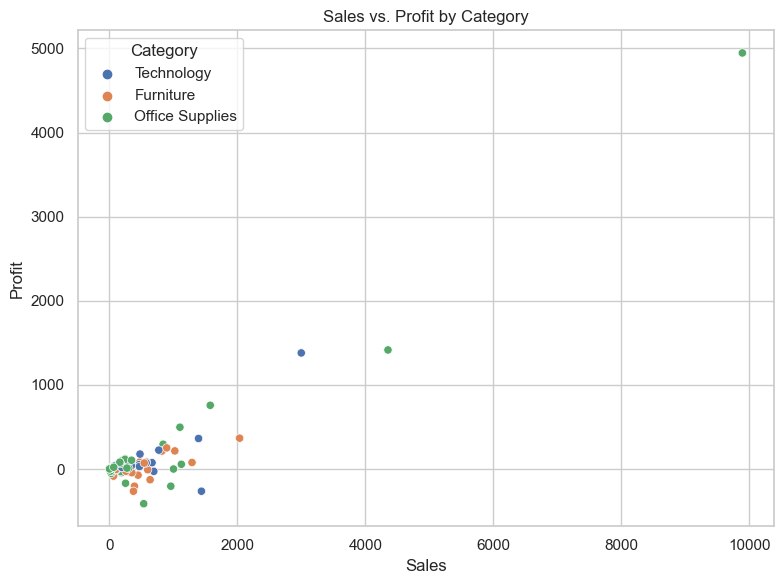

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Sales', y='Profit', hue='Category')
plt.title('Sales vs. Profit by Category')
plt.tight_layout()
plt.show()